<a href="https://colab.research.google.com/github/Rafaelnasario/Estudo_case/blob/main/RAFINHAMACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indicador MACD como porcentagem para pegar sobre compra**

In [23]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [24]:
# importando dados das açoes

df= yf.download('PETR4.SA', start="2021-01-01", end="2024-12-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,10.287006,74719700
2021-01-05,28.900000,30.180000,28.240000,30.040001,10.689092,95181100
2021-01-06,30.160000,30.900000,30.049999,30.100000,10.710443,96562500
2021-01-07,30.340000,31.150000,30.340000,31.000000,11.030690,56171300
2021-01-08,31.459999,31.760000,30.350000,31.120001,11.073389,67136300
...,...,...,...,...,...,...
2024-07-03,38.700001,38.790001,37.759998,37.840000,37.840000,38509400
2024-07-04,37.900002,37.959999,37.119999,37.320000,37.320000,32698800
2024-07-05,37.450001,37.650002,37.110001,37.520000,37.520000,32758800


In [25]:
# Criando o indicador MACD

shortEMA = df['Close'].ewm(span=12, adjust=False).mean()
longEMA = df['Close'].ewm(span=26, adjust=False).mean()
macd = shortEMA - longEMA
signal = macd.ewm(span=9, adjust=False).mean()
hist = macd - signal


In [26]:
# colocando em forma de tabela

df['ema12'] = shortEMA
df['ema26'] = longEMA
df['MACD'] = macd
df['Signal'] = signal
df['HistMACD'] = hist
df

,Open,High,Low,Close,Adj Close,Volume,ema12,ema26,MACD,Signal,HistMACD
Date,,,,,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,10.287006,74719700,28.910000,28.910000,0.000000,0.000000,0.000000
2021-01-05,28.900000,30.180000,28.240000,30.040001,10.689092,95181100,29.083846,28.993704,0.090143,0.018029,0.072114
2021-01-06,30.160000,30.900000,30.049999,30.100000,10.710443,96562500,29.240178,29.075652,0.164526,0.047328,0.117198
2021-01-07,30.340000,31.150000,30.340000,31.000000,11.030690,56171300,29.510919,29.218196,0.292724,0.096407,0.196316
2021-01-08,31.459999,31.760000,30.350000,31.120001,11.073389,67136300,29.758470,29.359070,0.399400,0.157006,0.242394
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03,38.700001,38.790001,37.759998,37.840000,37.840000,38509400,37.517696,37.467559,0.050137,-0.266530,0.316667
2024-07-04,37.900002,37.959999,37.119999,37.320000,37.320000,32698800,37.487281,37.456629,0.030653,-0.207094,0.237746
2024-07-05,37.450001,37.650002,37.110001,37.520000,37.520000,32758800,37.492315,37.461323,0.030992,-0.159476,0.190469


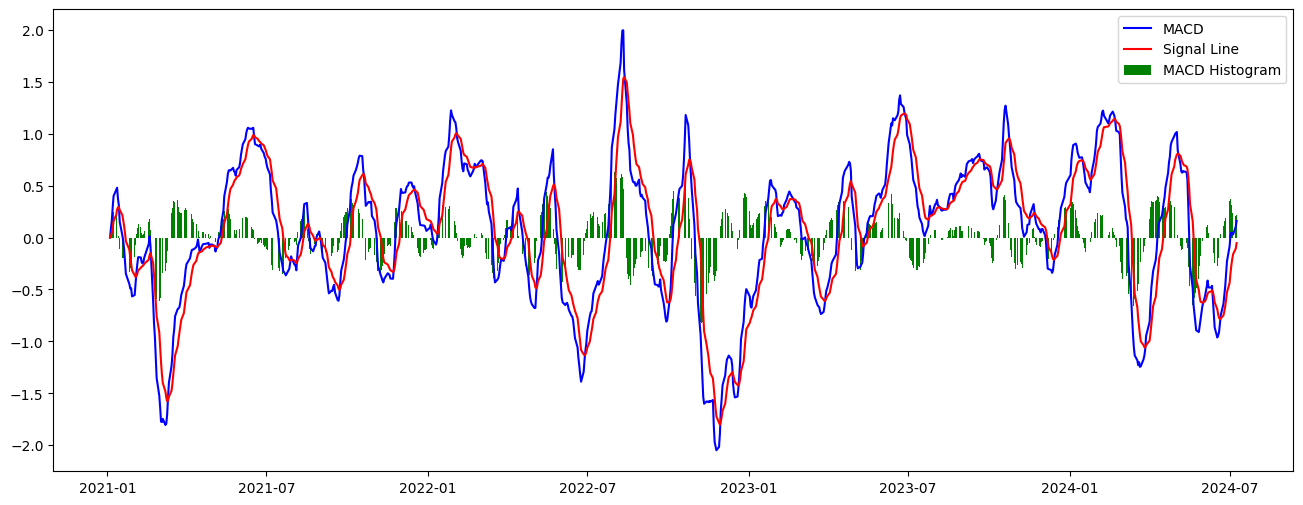

In [28]:
# Código para plotar gráfico do MACD
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(macd, label='MACD', color='blue')
plt.plot(signal, label='Signal Line', color='red')
plt.bar(hist.index, hist, label='MACD Histogram', color='green')
plt.legend()
plt.show()

In [29]:
# transformando histMACD em porcentagem

df['HistMACD'] = df['HistMACD'] * 100
df

,Open,High,Low,Close,Adj Close,Volume,ema12,ema26,MACD,Signal,HistMACD
Date,,,,,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,10.287006,74719700,28.910000,28.910000,0.000000,0.000000,0.000000
2021-01-05,28.900000,30.180000,28.240000,30.040001,10.689092,95181100,29.083846,28.993704,0.090143,0.018029,7.211403
2021-01-06,30.160000,30.900000,30.049999,30.100000,10.710443,96562500,29.240178,29.075652,0.164526,0.047328,11.719803
2021-01-07,30.340000,31.150000,30.340000,31.000000,11.030690,56171300,29.510919,29.218196,0.292724,0.096407,19.631649
2021-01-08,31.459999,31.760000,30.350000,31.120001,11.073389,67136300,29.758470,29.359070,0.399400,0.157006,24.239442
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03,38.700001,38.790001,37.759998,37.840000,37.840000,38509400,37.517696,37.467559,0.050137,-0.266530,31.666714
2024-07-04,37.900002,37.959999,37.119999,37.320000,37.320000,32698800,37.487281,37.456629,0.030653,-0.207094,23.774612
2024-07-05,37.450001,37.650002,37.110001,37.520000,37.520000,32758800,37.492315,37.461323,0.030992,-0.159476,19.046852


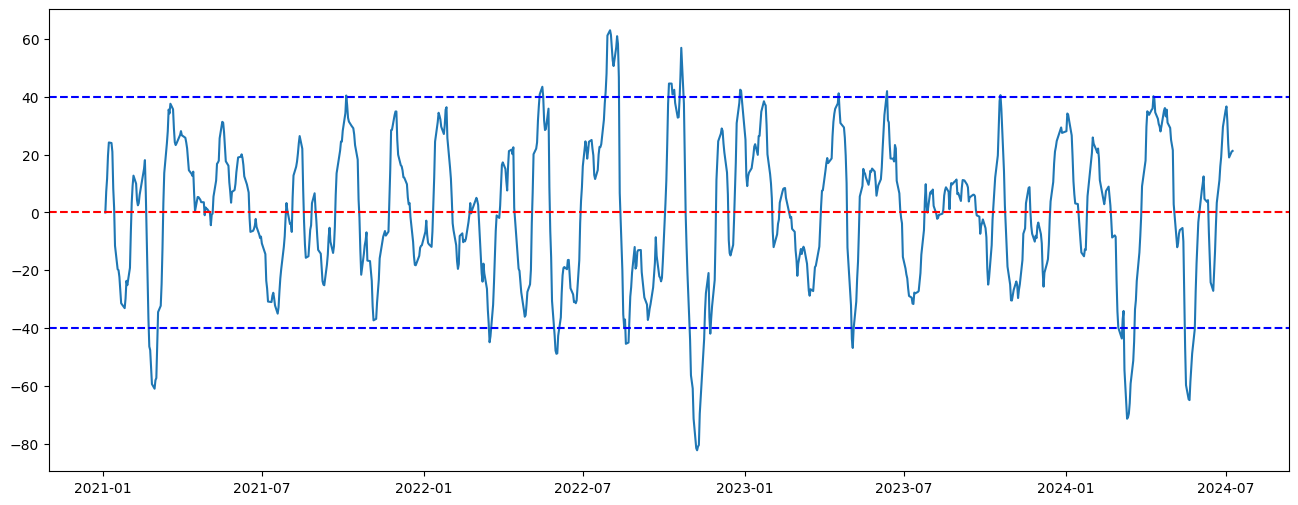

In [32]:
# trazendo histMACD em hum grafico, com marca da agua para facilitar visualizaçao

plt.figure(figsize=(16, 6))
plt.plot(df['HistMACD'])
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=40, color='b', linestyle='--')
plt.axhline(y=-40, color='b', linestyle='--')
plt.show()

